# Capstone Code

What is the likelihood of seeing some exciting action during a baseball game? A common criticism of baseball is the fact that for long stretches of time, nothing interesting happens on offense. For a casual fan, watching hitting is frequently more interesting than watching pitching and defense. If a fan tunes into a game at the start of an inning, which potential variables can he or she use to judge whether or not they will witness hits and runs for that particular inning?

The dataset used for this initial data exploration was obtained from Retrosheet's play-by-play event files (http://www.retrosheet.org/game.htm). The downloads may be parsed into .csv files using programs they provide. An alternative is to use R and a set of files known as Chadwick to parse a season's play-by-play data into a single .csv file, as detailed at http://isaacmiller.co/how-to-create-a-single-season-csv-of-retrosheet-play-by-play-data-pc/.  

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("D:/SB DATA/Retrosheets/data2016.csv")
data.head()

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (65,66,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,GAME_ID,AWAY_TEAM_ID,INN_CT,BAT_HOME_ID,OUTS_CT,BALLS_CT,STRIKES_CT,PITCH_SEQ_TX,AWAY_SCORE_CT,...,REMOVED_FOR_PH_BAT_FLD_CD,PO1_FLD_CD,PO2_FLD_CD,PO3_FLD_CD,ASS1_FLD_CD,ASS2_FLD_CD,ASS3_FLD_CD,ASS4_FLD_CD,ASS5_FLD_CD,EVENT_ID
0,1,ANA201604040,CHN,1,0,0,1,0,BX,0,...,0,0,0,0,0,0,0,0,0,1
1,2,ANA201604040,CHN,1,0,0,0,0,X,0,...,0,3,0,0,6,0,0,0,0,2
2,3,ANA201604040,CHN,1,0,1,0,2,SFS,0,...,0,2,0,0,0,0,0,0,0,3
3,4,ANA201604040,CHN,1,0,2,1,1,BCX,0,...,0,0,0,0,0,0,0,0,0,4
4,5,ANA201604040,CHN,1,0,2,2,2,BSS*B1S,1,...,0,3,0,0,2,0,0,0,0,5


In [3]:
len(data)

190715

In [4]:
list(data)

['Unnamed: 0',
 'GAME_ID',
 'AWAY_TEAM_ID',
 'INN_CT',
 'BAT_HOME_ID',
 'OUTS_CT',
 'BALLS_CT',
 'STRIKES_CT',
 'PITCH_SEQ_TX',
 'AWAY_SCORE_CT',
 'HOME_SCORE_CT',
 'BAT_ID',
 'BAT_HAND_CD',
 'RESP_BAT_ID',
 'RESP_BAT_HAND_CD',
 'PIT_ID',
 'PIT_HAND_CD',
 'RESP_PIT_ID',
 'RESP_PIT_HAND_CD',
 'POS2_FLD_ID',
 'POS3_FLD_ID',
 'POS4_FLD_ID',
 'POS5_FLD_ID',
 'POS6_FLD_ID',
 'POS7_FLD_ID',
 'POS8_FLD_ID',
 'POS9_FLD_ID',
 'BASE1_RUN_ID',
 'BASE2_RUN_ID',
 'BASE3_RUN_ID',
 'EVENT_TX',
 'LEADOFF_FL',
 'PH_FL',
 'BAT_FLD_CD',
 'BAT_LINEUP_ID',
 'EVENT_CD',
 'BAT_EVENT_FL',
 'AB_FL',
 'H_FL',
 'SH_FL',
 'SF_FL',
 'EVENT_OUTS_CT',
 'DP_FL',
 'TP_FL',
 'RBI_CT',
 'WP_FL',
 'PB_FL',
 'FLD_CD',
 'BATTEDBALL_CD',
 'BUNT_FL',
 'FOUL_FL',
 'BATTEDBALL_LOC_TX',
 'ERR_CT',
 'ERR1_FLD_CD',
 'ERR1_CD',
 'ERR2_FLD_CD',
 'ERR2_CD',
 'ERR3_FLD_CD',
 'ERR3_CD',
 'BAT_DEST_ID',
 'RUN1_DEST_ID',
 'RUN2_DEST_ID',
 'RUN3_DEST_ID',
 'BAT_PLAY_TX',
 'RUN1_PLAY_TX',
 'RUN2_PLAY_TX',
 'RUN3_PLAY_TX',
 'RUN1_SB_FL',
 

For now, the 2016 MLB season is selected to be investigated. There are 190,715 plays, and 98 features as detailed at http://www.retrosheet.org/datause.txt.  

A few features are selected to form a smaller data frame to work with. Some additional fields are added to improve processing efficiency.

In [5]:
pd.options.mode.chained_assignment = None

In [6]:
subset = data[['GAME_ID','AWAY_TEAM_ID','INN_CT','LEADOFF_FL','BAT_HOME_ID','AWAY_SCORE_CT','HOME_SCORE_CT','BAT_LINEUP_ID','H_FL']]
subset['HOME_TEAM_ID'] = subset['GAME_ID'].astype(str).str[:3]
subset = subset[['GAME_ID','AWAY_TEAM_ID','HOME_TEAM_ID','INN_CT','LEADOFF_FL','BAT_HOME_ID','AWAY_SCORE_CT',\
                 'HOME_SCORE_CT','BAT_LINEUP_ID','H_FL']]
subset.head()

,GAME_ID,AWAY_TEAM_ID,HOME_TEAM_ID,INN_CT,LEADOFF_FL,BAT_HOME_ID,AWAY_SCORE_CT,HOME_SCORE_CT,BAT_LINEUP_ID,H_FL
0,ANA201604040,CHN,ANA,1,True,0,0,0,1,2
1,ANA201604040,CHN,ANA,1,False,0,0,0,2,0
2,ANA201604040,CHN,ANA,1,False,0,0,0,3,0
3,ANA201604040,CHN,ANA,1,False,0,0,0,4,1
4,ANA201604040,CHN,ANA,1,False,0,1,0,5,0


In [7]:
np.unique(subset['HOME_TEAM_ID'])

array(['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CHA', 'CHN', 'CIN', 'CLE',
       'COL', 'DET', 'HOU', 'KCA', 'LAN', 'MIA', 'MIL', 'MIN', 'NYA',
       'NYN', 'OAK', 'PHI', 'PIT', 'SDN', 'SEA', 'SFN', 'SLN', 'TBA',
       'TEX', 'TOR', 'WAS'], dtype=object)

In [8]:
AL = ['ANA','BAL','BOS','CHA','CLE','DET','HOU','KCA','MIN','NYA','OAK','SEA','TBA','TEX','TOR']
NL = ['ARI','ATL','CHN','CIN','COL','LAN','MIA','MIL','NYN','PHI','PIT','SDN','SFN','SLN','WAS']
leagues = [AL,NL]
league_names = ['AL','NL']
teams = AL + NL

In [9]:
team_means = pd.DataFrame()
pos = 0
for team in teams:
    bat = subset[((subset.AWAY_TEAM_ID == team) & (subset.BAT_HOME_ID == 0)) | ((subset.HOME_TEAM_ID == team) \
                                                                                 & (subset.BAT_HOME_ID == 1))]
    home = bat['HOME_TEAM_ID'] == team
    bat['HOME_FL'] = home
    bat = bat.reset_index(drop= True)

    prev_runs = 0
    prev_play = 0
    runs = []
    leadoff_pos = []
    inn = []
    for row in bat.itertuples():    
        if row.LEADOFF_FL == True:
            leadoff_pos.append(row.BAT_LINEUP_ID)

            if row.INN_CT < 10:
                inn.append(row.INN_CT)
            else:
                inn.append('10+')

            if row.Index == 0:
                continue

            if row.INN_CT == 1:
                runs.append(prev_play-prev_runs)
                prev_runs = 0            
            else:
                if row.HOME_FL == True:
                    runs.append(row.HOME_SCORE_CT - prev_runs)
                    prev_runs = row.HOME_SCORE_CT
                else:
                    runs.append(row.AWAY_SCORE_CT - prev_runs)
                    prev_runs = row.AWAY_SCORE_CT

        if row.HOME_FL == True:
            prev_play = row.HOME_SCORE_CT
        else:
            prev_play = row.AWAY_SCORE_CT

        if row.Index == (len(bat)-1):
            runs.append(prev_play-prev_runs)
    
    innings = pd.DataFrame({'Leadoff': leadoff_pos, team: runs, 'Inning':inn})
    means = innings.groupby('Leadoff').mean()
    
    team_means = pd.concat([team_means,means],axis=1)
    
    innings = pd.DataFrame({'Leadoff': leadoff_pos, 'Runs': runs, 'Inning':inn})
    if pos==0:
        inn_cts = innings.Leadoff.value_counts()
        sums = innings.groupby('Leadoff').sum()
    else:
        inn_cts = innings.Leadoff.value_counts() + inn_cts
        sums = innings.groupby('Leadoff').sum() + sums
    pos=1

In [10]:
sums['Innings'] = inn_cts
sums['mean'] = sums.Runs/sums.Innings
sums

,Runs,Innings,mean
Leadoff,,,
1,5109,9163,0.557568
2,2082,3685,0.564993
3,1939,3635,0.533425
4,2491,5228,0.476473
5,2180,4777,0.456353
6,1679,4185,0.401195
7,1843,4236,0.435080
8,2085,4399,0.473971
9,2082,4151,0.501566


For now, start exploring data (data story)

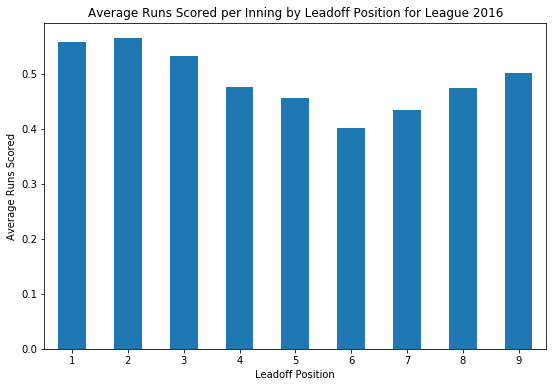

In [11]:
sums['mean'].plot(kind='bar',rot=0,legend=False,figsize=(9,6))
plt.xlabel('Leadoff Position')
plt.ylabel('Average Runs Scored')
plt.title('Average Runs Scored per Inning by Leadoff Position for League 2016')

In [12]:
teams = AL+NL
league_means = pd.DataFrame()
league_hits = pd.DataFrame()
league_runs_inn = pd.DataFrame()
league_hits_inn = pd.DataFrame()

lc = 0

for league in leagues:
    pos = 0
    for team in league:
        bat = subset[((subset.AWAY_TEAM_ID == team) & (subset.BAT_HOME_ID == 0)) | ((subset.HOME_TEAM_ID == team) \
                                                                                     & (subset.BAT_HOME_ID == 1))]
        home = bat['HOME_TEAM_ID'] == team
        bat['HOME_FL'] = home
        bat = bat.reset_index(drop= True)

        prev_runs = 0
        prev_play = 0
        runs = []
        leadoff_pos = []
        inn = []
        hits = []
        inn_hits = 0
        
        for row in bat.itertuples():    
            if row.LEADOFF_FL == True:
                leadoff_pos.append(row.BAT_LINEUP_ID)

                if row.INN_CT < 10:
                    inn.append(row.INN_CT)
                else:
                    inn.append('10+')

                if row.Index == 0:
                    continue

                hits.append(inn_hits)
                inn_hits = 0
        
                if row.INN_CT == 1:
                    runs.append(prev_play-prev_runs)
                    prev_runs = 0            
                else:
                    if row.HOME_FL == True:
                        runs.append(row.HOME_SCORE_CT - prev_runs)
                        prev_runs = row.HOME_SCORE_CT
                    else:
                        runs.append(row.AWAY_SCORE_CT - prev_runs)
                        prev_runs = row.AWAY_SCORE_CT

            if row.HOME_FL == True:
                prev_play = row.HOME_SCORE_CT
            else:
                prev_play = row.AWAY_SCORE_CT

            if (row.H_FL > 0):
                inn_hits += 1                
                
            if row.Index == (len(bat)-1):
                runs.append(prev_play-prev_runs)
                hits.append(inn_hits)
                

        innings = pd.DataFrame({'Leadoff': leadoff_pos, team: runs, 'Inning':inn})
        means = innings.groupby('Leadoff').mean()

        innings = pd.DataFrame({'Leadoff': leadoff_pos, 'Runs': runs, 'Inning':inn, 'Hits':hits})
        if pos==0:
            inn_cts = innings.Leadoff.value_counts()
            inn_tot = innings.Inning.value_counts()
            sums = innings.groupby('Leadoff').sum()
            gb_inn = innings.groupby('Inning').sum()
        else:
            inn_cts = innings.Leadoff.value_counts() + inn_cts
            inn_tot = innings.Inning.value_counts() + inn_tot
            sums = innings.groupby('Leadoff').sum() + sums
            gb_inn = innings.groupby('Inning').sum() + gb_inn
        pos=1

    
    sums['Innings'] = inn_cts
    sums['mean'] = sums.Runs/sums.Innings
    sums['Avg_hits'] = sums.Hits/sums.Innings
    league_means[league_names[lc]] = sums['mean']
    league_hits[league_names[lc]] = sums['Avg_hits']
    
    gb_inn['Total'] = inn_tot
    gb_inn['MeanRuns'] = gb_inn.Runs/gb_inn.Total
    gb_inn['MeanHits'] = gb_inn.Hits/gb_inn.Total
    league_runs_inn[league_names[lc]] = gb_inn['MeanRuns']
    league_hits_inn[league_names[lc]] = gb_inn['MeanHits']
    
    lc = 1
    

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:5006: RuntimeWarning: unorderable types: numpy.ndarray() > str(), sort order is undefined for incomparable objects
  return_indexers=True)


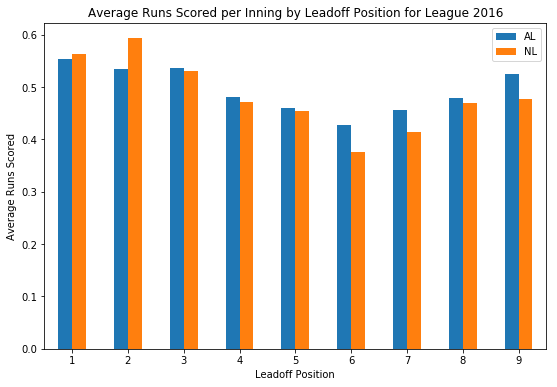

In [13]:
league_means.plot(kind='bar',rot=0,figsize=(9,6))
plt.xlabel('Leadoff Position')
plt.ylabel('Average Runs Scored')
plt.title('Average Runs Scored per Inning by Leadoff Position for League 2016')

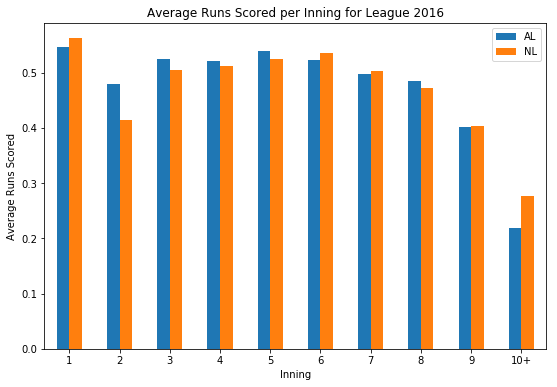

In [14]:
league_runs_inn.plot(kind='bar',rot=0,figsize=(9,6))
plt.xlabel('Inning')
plt.ylabel('Average Runs Scored')
plt.title('Average Runs Scored per Inning for League 2016')

From the visualizations, for runs per inning, there is a slight drop for the second inning before going up a little into the mid-innings, then trending down from there.  Unsurprisingly, the presence of the DH allowed the AL teams to have slightly better offensive numbers.  

When considering leadoff positions, there was a similar trend in that starting with the top of the order led to more runs, and leading off with the 6th spot led to fewer runs. Surprisingly, NL teams did not average the fewest amount of runs for when the 9 hitter, usually the pitcher, leads off. Even if the first batter is almost a free out, the top of the lineup is still able to produce runs better than if the bottom of the order was due up.

We now iterate through the subset of data and generate more data fields, and a runs flag that will end up being our dependent variable.

In [15]:
runs = []
leadoff_pos = []
inn = []
hits = []
game_id = []
away_team = []
home_team = []
bat_team = []
away_score = []
home_score = []
inn_int = []
bat_score = []
batting = []
pitching = []

for league in leagues:
    pos = 0
    for team in league:
        bat = subset[((subset.AWAY_TEAM_ID == team) & (subset.BAT_HOME_ID == 0)) | ((subset.HOME_TEAM_ID == team) \
                                                                                     & (subset.BAT_HOME_ID == 1))]
        home = bat['HOME_TEAM_ID'] == team
        bat['HOME_FL'] = home
        bat = bat.reset_index(drop= True)

        prev_runs = 0
        prev_play = 0

        inn_hits = 0
        
        for row in bat.itertuples():            
            if row.LEADOFF_FL == True:
                leadoff_pos.append(row.BAT_LINEUP_ID)
                game_id.append(row.GAME_ID)
                away_team.append(row.AWAY_TEAM_ID)
                home_team.append(row.HOME_TEAM_ID)
                bat_team.append(row.BAT_HOME_ID)    
                away_score.append(row.AWAY_SCORE_CT)
                home_score.append(row.HOME_SCORE_CT)
                inn_int.append(row.INN_CT)

                if row.INN_CT < 10:
                    inn.append(row.INN_CT)
                else:
                    inn.append('10+')
                    
                if row.BAT_HOME_ID == 1:
                    bat_score.append(row.HOME_SCORE_CT)
                    batting.append(row.HOME_TEAM_ID)
                    pitching.append(row.AWAY_TEAM_ID)
                else:
                    bat_score.append(row.AWAY_SCORE_CT) 
                    batting.append(row.AWAY_TEAM_ID)
                    pitching.append(row.HOME_TEAM_ID)                    

                if row.Index == 0:
                    continue

                hits.append(inn_hits)
                inn_hits = 0
        
                if row.INN_CT == 1:
                    runs.append(prev_play-prev_runs)
                    prev_runs = 0            
                else:
                    if row.HOME_FL == True:
                        runs.append(row.HOME_SCORE_CT - prev_runs)
                        prev_runs = row.HOME_SCORE_CT
                    else:
                        runs.append(row.AWAY_SCORE_CT - prev_runs)
                        prev_runs = row.AWAY_SCORE_CT

            if row.HOME_FL == True:
                prev_play = row.HOME_SCORE_CT
            else:
                prev_play = row.AWAY_SCORE_CT

            if (row.H_FL > 0):
                inn_hits += 1                
                
            if row.Index == (len(bat)-1):
                runs.append(prev_play-prev_runs)
                hits.append(inn_hits)
            
    

In [16]:
innings = pd.DataFrame({'GameID': game_id, 'Away': away_team, 'Home': home_team, 'Inning':inn, 'BotFlag': bat_team, \
        'Leadoff': leadoff_pos, 'Runs': runs, 'Hits': hits, 'AwayScore': away_score, 'HomeScore': home_score, 'BatScore': \
                       bat_score, 'Batting': batting, 'Pitching': pitching})
cols = ['GameID','Away','Home','Inning','BotFlag','Batting','Pitching','Leadoff','AwayScore','HomeScore','BatScore','Runs','Hits']
innings = innings[cols]

In [17]:
innings.head()

,GameID,Away,Home,Inning,BotFlag,Batting,Pitching,Leadoff,AwayScore,HomeScore,BatScore,Runs,Hits
0,ANA201604040,CHN,ANA,1,1,ANA,CHN,1,1,0,0,0,0
1,ANA201604040,CHN,ANA,2,1,ANA,CHN,4,1,0,0,0,1
2,ANA201604040,CHN,ANA,3,1,ANA,CHN,8,1,0,0,0,0
3,ANA201604040,CHN,ANA,4,1,ANA,CHN,2,3,0,0,0,0
4,ANA201604040,CHN,ANA,5,1,ANA,CHN,5,3,0,0,0,0


In [18]:
runs_flag = []
run_diff = []

for row in innings.itertuples():
    runs_flag.append(row.Runs > 0)
    if (row.BotFlag == 1):
        run_diff.append(row.HomeScore-row.AwayScore)
    else:
        run_diff.append(row.AwayScore-row.HomeScore)

In [19]:
innings['RunDiff'] = run_diff
innings['RunsFlag'] = runs_flag

In [128]:
innings.head()

,GameID,Away,Home,Inning,BotFlag,Batting,Pitching,Leadoff,AwayScore,HomeScore,BatScore,Runs,Hits,RunDiff,RunsFlag
0,ANA201604040,CHN,ANA,1,1,ANA,CHN,1,1,0,0,0,0,-1,False
1,ANA201604040,CHN,ANA,2,1,ANA,CHN,4,1,0,0,0,1,-1,False
2,ANA201604040,CHN,ANA,3,1,ANA,CHN,8,1,0,0,0,0,-1,False
3,ANA201604040,CHN,ANA,4,1,ANA,CHN,2,3,0,0,0,0,-3,False
4,ANA201604040,CHN,ANA,5,1,ANA,CHN,5,3,0,0,0,0,-3,False


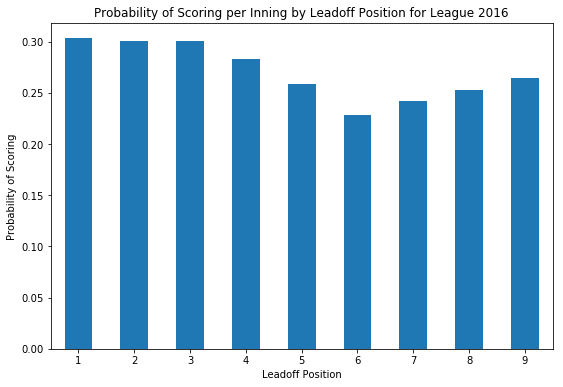

In [21]:
gbl = innings.groupby('Leadoff')
gbl.mean().RunsFlag.plot(kind='bar',rot=0,figsize=(9,6))
plt.xlabel('Leadoff Position')
plt.ylabel('Probability of Scoring')
plt.title('Probability of Scoring per Inning by Leadoff Position for League 2016')

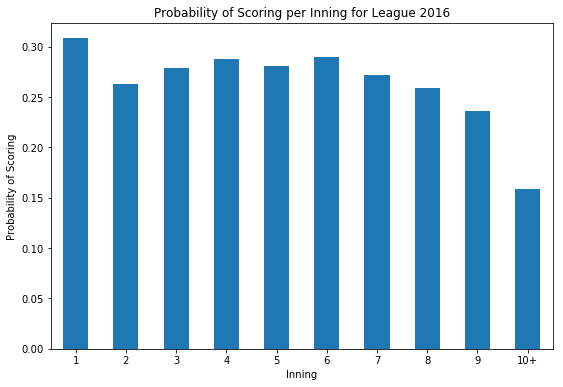

In [22]:
gbi = innings.groupby('Inning')
gbi.mean().RunsFlag.plot(kind='bar',rot=0,figsize=(9,6))
plt.xlabel('Inning')
plt.ylabel('Probability of Scoring')
plt.title('Probability of Scoring per Inning for League 2016')

The visualizations for probability of scoring are similar to the ones involving number of runs scored. 

We now proceed to testing various classification models. First, we will test whether encoding the innings/leadoff positions makes any difference.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [24]:
inn_arr = innings.Inning.astype(str)
le_inn = LabelEncoder()
le_inn.fit(inn_arr)
inn_tf = le_inn.transform(inn_arr)

In [25]:
lo_arr = innings.Leadoff.astype(str)
le_lo = LabelEncoder()
le_lo.fit(lo_arr)
lo_tf = le_lo.transform(lo_arr)

In [26]:
innings_enc = pd.DataFrame({'GameID': game_id, 'Away': away_team, 'Home': home_team, 'Inning':inn_tf, 'BotFlag': bat_team, \
        'Leadoff': lo_tf, 'Runs': runs, 'Hits': hits, 'AwayScore': away_score, 'HomeScore': home_score})
cols = ['GameID','Away','Home','Inning','BotFlag','Leadoff','AwayScore','HomeScore','Runs','Hits']
innings_enc = innings_enc[cols]
innings_enc.head()

,GameID,Away,Home,Inning,BotFlag,Leadoff,AwayScore,HomeScore,Runs,Hits
0,ANA201604040,CHN,ANA,0,1,0,1,0,0,0
1,ANA201604040,CHN,ANA,2,1,3,1,0,0,1
2,ANA201604040,CHN,ANA,3,1,7,1,0,0,0
3,ANA201604040,CHN,ANA,4,1,1,3,0,0,0
4,ANA201604040,CHN,ANA,5,1,4,3,0,0,0


In [27]:
inn_lo = np.matrix([inn_tf,lo_tf]).T
enc = OneHotEncoder(sparse=False)
encoded = enc.fit_transform(inn_lo)

In [28]:
X_select = np.hstack((encoded,np.matrix(innings.RunDiff).T))

In [29]:
X, Xtest, Y, Ytest = train_test_split(X_select, innings[['RunsFlag']].values,random_state=1)

In [30]:
clf = LogisticRegression()
clf.fit(X,Y.ravel())
print("Accuracy:",accuracy_score(clf.predict(Xtest),Ytest))
print("Precision:",precision_score(clf.predict(Xtest),Ytest))
print("Recall:",recall_score(clf.predict(Xtest),Ytest))

Accuracy: 0.727473538886
Precision: 0.0
Recall: 0.0


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [31]:
confusion_matrix(clf.predict(Xtest),Ytest)

array([[7904, 2961],
       [   0,    0]], dtype=int64)

Without treating as categorical variables, we return to not using OHE for the features:

In [32]:
X_select = np.matrix((leadoff_pos,inn_int,run_diff)).T
X, Xtest, Y, Ytest = train_test_split(X_select, innings[['RunsFlag']].values,random_state=1)
clf = LogisticRegression()
clf.fit(X,Y.ravel())
print("Accuracy:",accuracy_score(clf.predict(Xtest),Ytest))
print("Precision:",precision_score(clf.predict(Xtest),Ytest))
print("Recall:",recall_score(clf.predict(Xtest),Ytest))

Accuracy: 0.727473538886
Precision: 0.0
Recall: 0.0


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [33]:
confusion_matrix(clf.predict(Xtest),Ytest)

array([[7904, 2961],
       [   0,    0]], dtype=int64)

In [34]:
clf = LogisticRegression()
Cs = [0.001, 0.1, 1, 10, 100]
params = {"C":Cs}
gsmodel = GridSearchCV(clf,param_grid=params,cv=5)
gsmodel.fit(X,Y.ravel())
print("Best score:",gsmodel.best_score_)
print("Best C:",gsmodel.best_params_)

Best score: 0.725961833466
Best C: {'C': 0.001}


In [35]:
test_fit = LogisticRegression(C=0.001)
test_fit.fit(X,Y.ravel())
print("Accuracy:",accuracy_score(test_fit.predict(Xtest),Ytest))
print("Precision:",precision_score(test_fit.predict(Xtest),Ytest))
print("Recall:",recall_score(test_fit.predict(Xtest),Ytest))

Accuracy: 0.727473538886
Precision: 0.0
Recall: 0.0


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


The performance is still poor, so we test a Random Forest Classifier:

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
X, Xtest, Y, Ytest = train_test_split(X_select, innings[['RunsFlag']].values,random_state=1)

clf = RandomForestClassifier()
clf.fit(X,Y.ravel())
print("Accuracy:",accuracy_score(clf.predict(Xtest),Ytest))
print("Precision:",precision_score(clf.predict(Xtest),Ytest))
print("Recall:",recall_score(clf.predict(Xtest),Ytest))

Accuracy: 0.718269673263
Precision: 0.0290442418102
Recall: 0.316176470588


In [38]:
confusion_matrix(clf.predict(Xtest),Ytest)

array([[7718, 2875],
       [ 186,   86]], dtype=int64)

Better, but still not that good. Perhaps more features are needed, so we add features of which teams are playing (needs encoding)

In [39]:
bat_enc = LabelEncoder()
bat_tf = bat_enc.fit_transform(innings.Batting)
pitch_enc = LabelEncoder()
pitch_tf = pitch_enc.fit_transform(innings.Pitching)

In [40]:
inn_lo = np.matrix([bat_tf,pitch_tf]).T
enc = OneHotEncoder(sparse=False)
encoded = enc.fit_transform(inn_lo)
X_enc_select = np.hstack((encoded,X_select))
X_enc_select

matrix([[ 1.,  0.,  0., ...,  1.,  1., -1.],
        [ 1.,  0.,  0., ...,  4.,  2., -1.],
        [ 1.,  0.,  0., ...,  8.,  3., -1.],
        ..., 
        [ 0.,  0.,  0., ...,  9.,  6.,  3.],
        [ 0.,  0.,  0., ...,  3.,  7.,  3.],
        [ 0.,  0.,  0., ...,  7.,  8.,  1.]])

In [41]:
X, Xtest, Y, Ytest = train_test_split(X_enc_select,runs_flag,random_state=1)

In [42]:
clf = LogisticRegression()
Cs = [0.001, 0.1, 1, 10, 100]
params = {"C":Cs}
gsmodel = GridSearchCV(clf,param_grid=params,cv=5)
gsmodel.fit(X,Y)
print("Best score:",gsmodel.best_score_)
print("Best C:",gsmodel.best_params_)

Best score: 0.725961833466
Best C: {'C': 0.001}


In [43]:
test_fit = LogisticRegression(C=0.001)
test_fit.fit(X,Y)
print("Train Accuracy:",accuracy_score(test_fit.predict(X),Y),"| Test Accuracy:",accuracy_score(test_fit.predict(Xtest),Ytest))
print("Train Precision:",precision_score(test_fit.predict(X),Y),"| Test Precision:",precision_score(test_fit.predict(Xtest),Ytest))
print("Train Recall:",recall_score(test_fit.predict(X),Y),"| Test Recall:",recall_score(test_fit.predict(Xtest),Ytest))

Train Accuracy: 0.725961833466 | Test Accuracy: 0.727473538886
Train Precision: 0.0 | Test Precision: 0.0
Train Recall: 0.0 | Test Recall: 0.0


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


The performance is still subpar. Maybe the imbalanced data is the cause (roughly 30-70 split for T/F). Considering stratification along the Runs Flag:

In [44]:
X, Xtest, Y, Ytest = train_test_split(X_enc_select,runs_flag,random_state=1,stratify=runs_flag)

In [45]:
clf = LogisticRegression()
Cs = [0.001, 0.1, 1, 10, 100]
params = {"C":Cs}
gsmodel = GridSearchCV(clf,param_grid=params,cv=5)
gsmodel.fit(X,Y)
print("Best score:",gsmodel.best_score_)
print("Best C:",gsmodel.best_params_)

Best score: 0.726329999386
Best C: {'C': 0.001}


In [46]:
test_fit = LogisticRegression(C=0.001)
test_fit.fit(X,Y)
print("Train Accuracy:",accuracy_score(test_fit.predict(X),Y),"| Test Accuracy:",accuracy_score(test_fit.predict(Xtest),Ytest))
print("Train Precision:",precision_score(test_fit.predict(X),Y),"| Test Precision:",precision_score(test_fit.predict(Xtest),Ytest))
print("Train Recall:",recall_score(test_fit.predict(X),Y),"| Test Recall:",recall_score(test_fit.predict(Xtest),Ytest))

Train Accuracy: 0.726329999386 | Test Accuracy: 0.726369075012
Train Precision: 0.0 | Test Precision: 0.0
Train Recall: 0.0 | Test Recall: 0.0


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Stratification did not seem to do much. Proceed with Oversampling and Undersampling the data such that there are the same number of points with True and False. Continue with using stratification.

In [47]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [48]:
ada = RandomOverSampler(random_state=11)
X_res, Y_res = ada.fit_sample(X_enc_select, innings[['RunsFlag']].values.ravel())

In [49]:
np.unique(innings[['RunsFlag']].values.ravel(),return_counts=True)

(array([False,  True], dtype=bool), array([31566, 11893], dtype=int64))

In [50]:
np.unique(Y_res,return_counts=True)

(array([False,  True], dtype=bool), array([31566, 31566], dtype=int64))

In [51]:
X, Xtest, Y, Ytest = train_test_split(X_res,Y_res,random_state=1,stratify=Y_res)

In [52]:
clf = LogisticRegression()
Cs = [0.001, 0.1, 1, 10, 100]
params = {"C":Cs}
gsmodel = GridSearchCV(clf,param_grid=params,cv=5)
gsmodel.fit(X,Y)
print("Best score:",gsmodel.best_score_)
print("Best C:",gsmodel.best_params_)

Best score: 0.531711334981
Best C: {'C': 0.001}


In [53]:
test_fit = LogisticRegression(C=0.001)
test_fit.fit(X,Y)
print("Train Accuracy:",accuracy_score(test_fit.predict(X),Y),"| Test Accuracy:",accuracy_score(test_fit.predict(Xtest),Ytest))
print("Train Precision:",precision_score(test_fit.predict(X),Y),"| Test Precision:",precision_score(test_fit.predict(Xtest),Ytest))
print("Train Recall:",recall_score(test_fit.predict(X),Y),"| Test Recall:",recall_score(test_fit.predict(Xtest),Ytest))

Train Accuracy: 0.533274197977 | Test Accuracy: 0.528986884623
Train Precision: 0.475880713019 | Test Precision: 0.465788139888
Train Recall: 0.537576943265 | Test Recall: 0.533217290397


In [54]:
confusion_matrix(test_fit.predict(Xtest),Ytest)

array([[4673, 4216],
       [3218, 3676]], dtype=int64)

In [55]:
ada = RandomUnderSampler(random_state=11)
X_res, Y_res = ada.fit_sample(X_enc_select, innings[['RunsFlag']].values.ravel())

In [56]:
np.unique(Y_res,return_counts=True)

(array([False,  True], dtype=bool), array([11893, 11893], dtype=int64))

In [57]:
X, Xtest, Y, Ytest = train_test_split(X_res,Y_res,random_state=1,stratify=Y_res)

In [58]:
clf = LogisticRegression()
Cs = [0.001, 0.1, 1, 10, 100]
params = {"C":Cs}
gsmodel = GridSearchCV(clf,param_grid=params,cv=5)
gsmodel.fit(X,Y)
print("Best score:",gsmodel.best_score_)
print("Best C:",gsmodel.best_params_)

Best score: 0.528561017994
Best C: {'C': 0.001}


In [59]:
test_fit = LogisticRegression(C=0.001)
test_fit.fit(X,Y)
print("Train Accuracy:",accuracy_score(test_fit.predict(X),Y),"| Test Accuracy:",accuracy_score(test_fit.predict(Xtest),Ytest))
print("Train Precision:",precision_score(test_fit.predict(X),Y),"| Test Precision:",precision_score(test_fit.predict(Xtest),Ytest))
print("Train Recall:",recall_score(test_fit.predict(X),Y),"| Test Recall:",recall_score(test_fit.predict(Xtest),Ytest))

Train Accuracy: 0.534895453781 | Test Accuracy: 0.528838069615
Train Precision: 0.418096199125 | Test Precision: 0.41492938803
Train Recall: 0.545494441194 | Test Recall: 0.537456445993


In [60]:
confusion_matrix(test_fit.predict(Xtest),Ytest)

array([[1911, 1740],
       [1062, 1234]], dtype=int64)

Oversampling seemed a little better, but the results are not much better than guessing. Perhaps Logistic Regression is not suited for this problem.

Proceed with Random Forest Classifier instead:

In [61]:
ada = RandomOverSampler(random_state=11)
X_res, Y_res = ada.fit_sample(X_enc_select, innings[['RunsFlag']].values.ravel())
X, Xtest, Y, Ytest = train_test_split(X_res,Y_res,random_state=1,stratify=Y_res)

In [62]:
max_feat = ['auto','sqrt','log2',None]
n_est = [10,20,30]
min_sl = [0.25,0.4,1]
params = {"max_features":max_feat,"n_estimators":n_est,"min_samples_leaf":min_sl}

In [63]:
clf = RandomForestClassifier(oob_score=True,random_state=1)
gsmodel = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1)
gsmodel.fit(X,Y)
print("Best score:",gsmodel.best_score_)
print("Best params:",gsmodel.best_params_)

Best score: 0.747534266827
Best params: {'min_samples_leaf': 1, 'max_features': 'auto', 'n_estimators': 30}


In [64]:
test_fit = RandomForestClassifier(n_estimators=30,min_samples_leaf=1,max_features='auto',oob_score=True,random_state=1)
test_fit.fit(X,Y)
print("Test Accuracy:",accuracy_score(test_fit.predict(Xtest),Ytest))
print("Test Precision:",precision_score(test_fit.predict(Xtest),Ytest))
print("Test Recall:",recall_score(test_fit.predict(Xtest),Ytest))
print("OOB:",test_fit.oob_score_)

Test Accuracy: 0.778812646518
Test Precision: 0.839077546883
Test Recall: 0.7488408911
OOB: 0.768400599801


In [65]:
confusion_matrix(test_fit.predict(Xtest),Ytest)

array([[5670, 1270],
       [2221, 6622]], dtype=int64)

Promising results. Investigate ROC-AUC metrics:

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

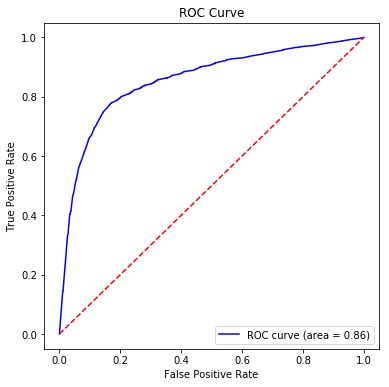

In [67]:
scores = test_fit.predict_proba(Xtest)
fpr, tpr, thresholds = roc_curve(Ytest,scores[:,1],pos_label=True)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='blue',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='red',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

Good results. Now, consider some additional modeling algorithms. First, K-Neighbors Classifier:

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
K = [2,3,4,5,8]
weights = ['uniform','distance']
leaf_size = [10,30,50]
params = {"n_neighbors":K,"weights":weights,"leaf_size":leaf_size}

In [76]:
clf = KNeighborsClassifier(n_jobs=-1)

gsmodel = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1)
gsmodel.fit(X,Y)
print("Best score:",gsmodel.best_score_)
print("Best params:",gsmodel.best_params_)

Best score: 0.728695431794
Best params: {'leaf_size': 10, 'n_neighbors': 2, 'weights': 'distance'}


In [77]:
test_fit = KNeighborsClassifier(n_neighbors=2,leaf_size=10,weights='distance',n_jobs=-1)
test_fit.fit(X,Y)
print("Train Accuracy:",accuracy_score(test_fit.predict(X),Y),"| Test Accuracy:",accuracy_score(test_fit.predict(Xtest),Ytest))
print("Train Precision:",precision_score(test_fit.predict(X),Y),"| Test Precision:",precision_score(test_fit.predict(Xtest),Ytest))
print("Train Recall:",recall_score(test_fit.predict(X),Y),"| Test Recall:",recall_score(test_fit.predict(Xtest),Ytest))

Train Accuracy: 0.920990939619 | Test Accuracy: 0.750364316036
Train Precision: 0.875897609192 | Test Precision: 0.767359351242
Train Recall: 0.962718789173 | Test Recall: 0.742156862745


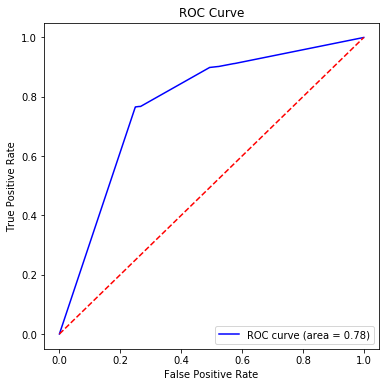

In [78]:
scores = test_fit.predict_proba(Xtest)
fpr, tpr, thresholds = roc_curve(Ytest,scores[:,1],pos_label=True)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='blue',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='red',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

Decent results, but not as good as Random Forest. Next, work with SVM classifiers.

In [80]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [88]:
C = [0.001,0.01,0.1,1,10]
g = [0.001,0.01,0.1,0.5,1]
params = {"C":C,"gamma":g}

In [89]:
clf = SVC(max_iter=1000,random_state=1)

gsmodel = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1)
gsmodel.fit(X,Y)
print("Best score:",gsmodel.best_score_)
print("Best params:",gsmodel.best_params_)

Best score: 0.525312044605
Best params: {'gamma': 0.5, 'C': 0.1}


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [91]:
test_fit = SVC(C=0.1,gamma=0.5,max_iter=10000,random_state=1)
test_fit.fit(X,Y)
print("Train Accuracy:",accuracy_score(test_fit.predict(X),Y),"| Test Accuracy:",accuracy_score(test_fit.predict(Xtest),Ytest))
print("Train Precision:",precision_score(test_fit.predict(X),Y),"| Test Precision:",precision_score(test_fit.predict(Xtest),Ytest))
print("Train Recall:",recall_score(test_fit.predict(X),Y),"| Test Recall:",recall_score(test_fit.predict(Xtest),Ytest))

Train Accuracy: 0.769055312678 | Test Accuracy: 0.637458024457
Train Precision: 0.765143195066 | Test Precision: 0.681829700963
Train Recall: 0.771169483588 | Test Recall: 0.626280260708


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Consider LinearSVC. SVC parameter tuning had extremely wrong runtime, so max_iter had to be set to a value such that the algorithm terminated in a reasonable amount of time. However, the algorithm did not converge, and increasing max_iter seemed to improve results. 

In [92]:
params = {"C":C}

In [94]:
clf = LinearSVC(max_iter=1000,random_state=1)

gsmodel = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1)
gsmodel.fit(X,Y)
print("Best score:",gsmodel.best_score_)
print("Best params:",gsmodel.best_params_)

Best score: 0.531352298887
Best params: {'C': 1}


In [95]:
test_fit = LinearSVC(C=1)
test_fit.fit(X,Y)
print("Train Accuracy:",accuracy_score(test_fit.predict(X),Y),"| Test Accuracy:",accuracy_score(test_fit.predict(Xtest),Ytest))
print("Train Precision:",precision_score(test_fit.predict(X),Y),"| Test Precision:",precision_score(test_fit.predict(Xtest),Ytest))
print("Train Recall:",recall_score(test_fit.predict(X),Y),"| Test Recall:",recall_score(test_fit.predict(Xtest),Ytest))

Train Accuracy: 0.53749815202 | Test Accuracy: 0.526832668061
Train Precision: 0.53007518797 | Test Precision: 0.511657374557
Train Recall: 0.538052566136 | Test Recall: 0.527705175118


LinearSVC did not have very good results, being similar to Logistic Regression. SVC showed potential, but was handicapped by hardware limitations.  

Finally, test the Decision Tree Classifier:

In [96]:
from sklearn.tree import DecisionTreeClassifier
md = [None,3,5]
params = {"min_samples_leaf":min_sl,"max_depth":md}

In [99]:
clf = DecisionTreeClassifier(random_state=1)

gsmodel = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1)
gsmodel.fit(X,Y)
print("Best score:",gsmodel.best_score_)
print("Best params:",gsmodel.best_params_)

Best score: 0.71473526368
Best params: {'min_samples_leaf': 1, 'max_depth': None}


In [101]:
test_fit = DecisionTreeClassifier(max_depth=None,min_samples_leaf=1,random_state=1)
test_fit.fit(X,Y)
print("Train Accuracy:",accuracy_score(test_fit.predict(X),Y),"| Test Accuracy:",accuracy_score(test_fit.predict(Xtest),Ytest))
print("Train Precision:",precision_score(test_fit.predict(X),Y),"| Test Precision:",precision_score(test_fit.predict(Xtest),Ytest))
print("Train Recall:",recall_score(test_fit.predict(X),Y),"| Test Recall:",recall_score(test_fit.predict(Xtest),Ytest))

Train Accuracy: 0.942490865699 | Test Accuracy: 0.750554393968
Train Precision: 0.949607163977 | Test Precision: 0.834262544349
Train Recall: 0.936279205364 | Test Recall: 0.714642353197


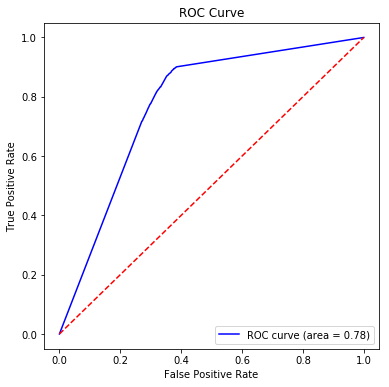

In [102]:
scores = test_fit.predict_proba(Xtest)
fpr, tpr, thresholds = roc_curve(Ytest,scores[:,1],pos_label=True)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='blue',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='red',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

Decision Trees had decent performance too, however Random Forests still appear to be superior.  

Select Random Forest model due to its performance. Test for effect of randomness/CV on the model.

In [120]:
acc = []
prec = []
rec = []
oob = []

for k in range(1,11):
    X, Xtest, Y, Ytest = train_test_split(X_res,Y_res,random_state=k,stratify=Y_res)
    test_fit = RandomForestClassifier(n_estimators=30,min_samples_leaf=1,max_features='auto',oob_score=True,random_state=k)
    test_fit.fit(X,Y)
    Y_fit = test_fit.predict(Xtest)
    acc.append(accuracy_score(Y_fit,Ytest))
    prec.append(precision_score(Y_fit,Ytest))
    rec.append(recall_score(Y_fit,Ytest))
    oob.append(test_fit.oob_score_)


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


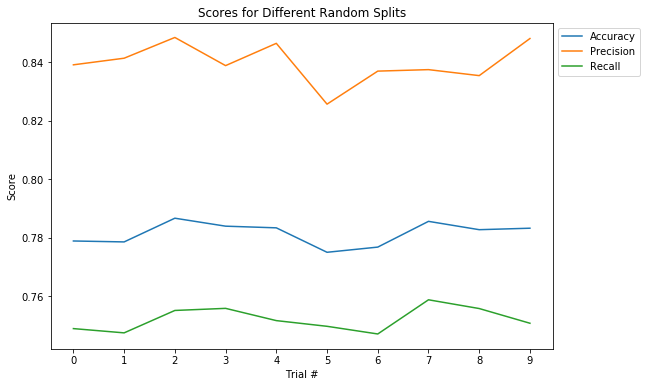

In [127]:
plt.figure(figsize=(9,6))
plt.plot(acc)
plt.plot(prec)
plt.plot(rec)
plt.legend(["Accuracy","Precision","Recall"],bbox_to_anchor=(1,1))
plt.xticks(range(0,10))
plt.xlabel("Trial #")
plt.ylabel("Score")
plt.title("Scores for Different Random Splits")

Based on the findings in this project, we conclude that is possible to predict with roughly 75% accuracy whether or not there will be any scoring in a half-inning based only on information available at the beginning of the half-inning. The model that performed the best under the scoring metrics was the Random Forest Classifier, which achieved >75% accuracy, precision, and recall while having the highest AUC for the ROC curve.

We can recommend potential clients to take note of the inning, leadoff position, teams playing, and score differential at the beginning of an inning, and input those points into the model to get a prediction of whether there will be scoring in the inning. The model can provide an estimate of the scoring, which could help advertisers and broadcasters from determining when to air ads for maximum viewership. Fans can decide whether they want to watch a particular half inning if they are only interested in watching innings involving scoring.

Any prospective analysts interested in further improving the model can attempt to include more features into the model, or consider a wider variety of modeling algorithms. A new definition of an “interesting” inning could be determined; for instance, instead of the dependent variable being a flag that specifies whether any scoring occurred, the dependent variable could be changed to a flag indicating a certain number of hits, whether there were homeruns, or a certain amount of batters came to the plate. Numeric dependent variables could be considered as well, such as number of runs scored in an inning. This leads the way to consideration of regression models in addition to classification models. However, better hardware is recommended, as the processing time for some the models was already quite long, and including more features would only increase that time even further.

Overall, we have found that the Random Forest Classifier model can provide a quick, rough estimate of whether there will be any scoring in an inning given only some features that are available when the inning starts. The model performed relatively well when considering various scoring metrics, but can definitely be improved with future work.